# Resultados da Análise Topológica da Rede Projetada
Rede Projetada sobre os microRNAs

# Importação de Bibliotecas

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Constantes

## Pastas de Dados

In [2]:
# Caminho da pasta raiz de dados
DATA_PATH = Path.cwd().parent / 'data'

# Caminho da pasta de dados processados
PROCESSED_DATA_PATH = DATA_PATH / 'processed'

# Caminho da pasta de dados resultantes da análise topológica
ANALYSIS_DATA_PATH = PROCESSED_DATA_PATH / 'topology-analysis'

# Caminho da pasta de dados resultantes da análise da rede projetada
NETWORK_DATA_PATH = ANALYSIS_DATA_PATH / 'projected-network'

## Pastas de Imagens

In [3]:
# Caminho da pasta raiz de imagens
IMAGES_PATH = Path.cwd().parent / 'images'

# Caminho da pasta de imagens da rede projetada
NETWORK_IMAGES_PATH = IMAGES_PATH / 'projected-network'

# Carregamento de Dados

In [4]:
# Lê o arquivo com os resultados da centralidade de intermediação ponderada
df_wbetweenness = pd.read_csv(
    filepath_or_buffer=Path(NETWORK_DATA_PATH / 'weighted-betweenness-centrality.csv')
)

# Lê o arquivo com os resultados da centralidade de grau ponderada
df_wdegree = pd.read_csv(
    filepath_or_buffer=Path(NETWORK_DATA_PATH / 'weighted-degree-centrality.csv')
)

# Análise dos Resultados

## Centralidade Grau

### Distribuição

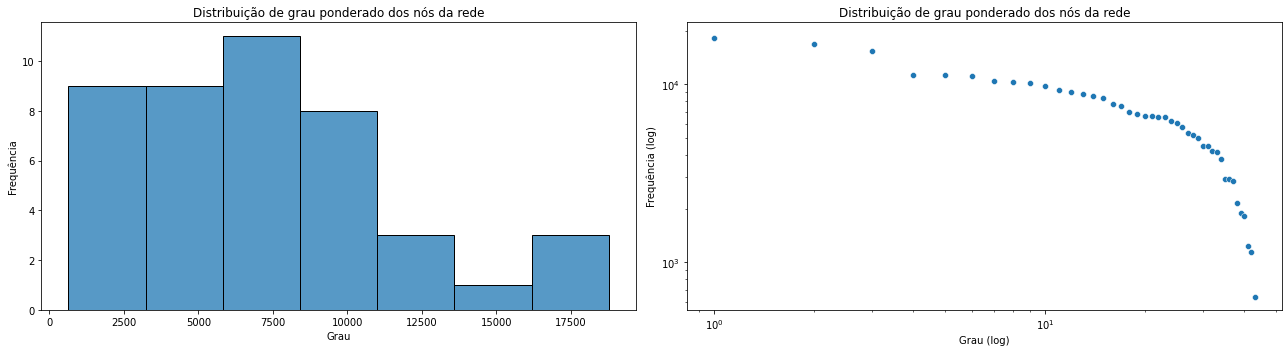

In [5]:
# Cria o subplot para três figuras em uma linha
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Plota a distribuição de grau ponderado dos nós
sns.histplot(data=df_wdegree['weightedDegree'], ax=axes[0])
axes[0].set_title('Distribuição de grau ponderado dos nós da rede')
axes[0].set_xlabel('Grau')
axes[0].set_ylabel('Frequência')

# Plota a distribuição log-log de grau ponderado dos nós
sns.scatterplot(data=df_wdegree['weightedDegree'], ax=axes[1])
axes[1].set_title('Distribuição de grau ponderado dos nós da rede')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Grau (log)')
axes[1].set_ylabel('Frequência (log)')

# Salva a figura
plt.tight_layout()
fig.savefig(fname=NETWORK_IMAGES_PATH / 'weighted-degree-centrality-distribution.png', dpi=300)

# Exibe o subplot
plt.show()

### Estatísticas Descritivas

In [6]:
# Calcula as estatísticas da centralidade de grau ponderada
df_wdegree['weightedDegree'].describe()

count       44.000000
mean      7163.909091
std       4388.324339
min        637.000000
25%       4183.500000
50%       6578.000000
75%       9453.750000
max      18783.000000
Name: weightedDegree, dtype: float64

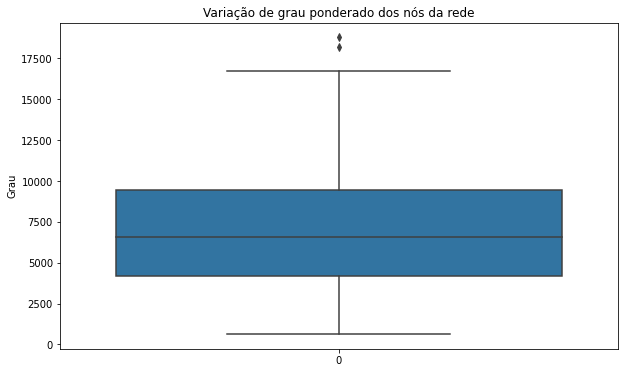

In [7]:
# Plota a variação de grau ponderado dos nós
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_wdegree['weightedDegree'])
plt.title('Variação de grau ponderado dos nós da rede')
plt.xlabel('')
plt.ylabel('Grau')

# Salva a figura
plt.savefig(fname=NETWORK_IMAGES_PATH / 'weighted-degree-centrality-boxplot.png', dpi=300)

# Exibe a figura
plt.show()

### Top-5 MicroRNAs

In [8]:
# Filtra o top-5 microRNAs conforme a centralidade de grau ponderada
df_wdegree.head()

,miR,weightedDegree
0,hsa-miR-665,18783.0
1,hsa-miR-485-5p,18224.0
2,hsa-miR-381-3p,16755.0
3,hsa-miR-493-5p,15352.0
4,hsa-miR-543,11322.0


## Centralidade de Intermediação

### Distribuição

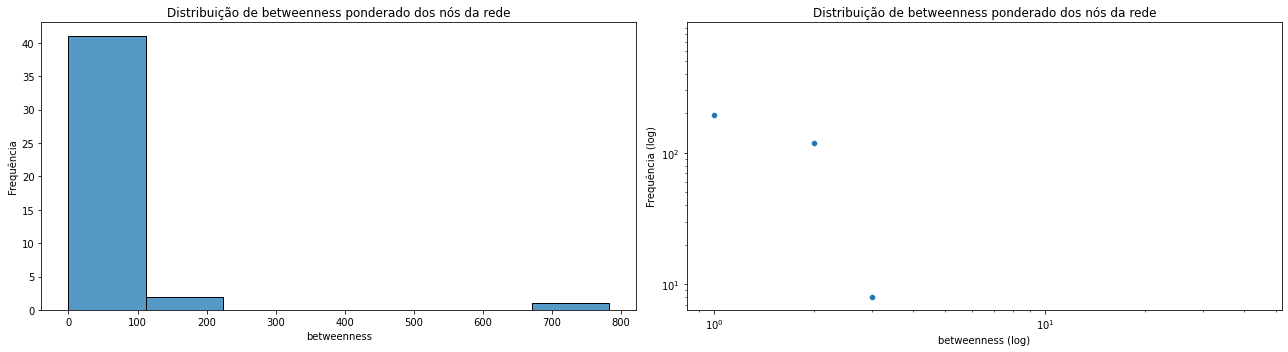

In [9]:
# Cria o subplot para três figuras em uma linha
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Plota a distribuição de betweenness ponderado dos nós
sns.histplot(data=df_wbetweenness['weightedBetweenness'], ax=axes[0])
axes[0].set_title('Distribuição de betweenness ponderado dos nós da rede')
axes[0].set_xlabel('betweenness')
axes[0].set_ylabel('Frequência')

# Plota a distribuição log-log de betweenness ponderado dos nós
sns.scatterplot(data=df_wbetweenness['weightedBetweenness'], ax=axes[1])
axes[1].set_title('Distribuição de betweenness ponderado dos nós da rede')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('betweenness (log)')
axes[1].set_ylabel('Frequência (log)')

# Salva a figura
plt.tight_layout()
fig.savefig(fname=NETWORK_IMAGES_PATH / 'weighted-betweenness-centrality-distribution.png', dpi=300)

# Exibe o subplot
plt.show()

### Estatísticas Descritivas

In [10]:
# Calcula as estatísticas da centralidade de intermediação ponderada
df_wbetweenness['weightedBetweenness'].describe()

count     44.000000
mean      25.128788
std      121.785600
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      783.000000
Name: weightedBetweenness, dtype: float64

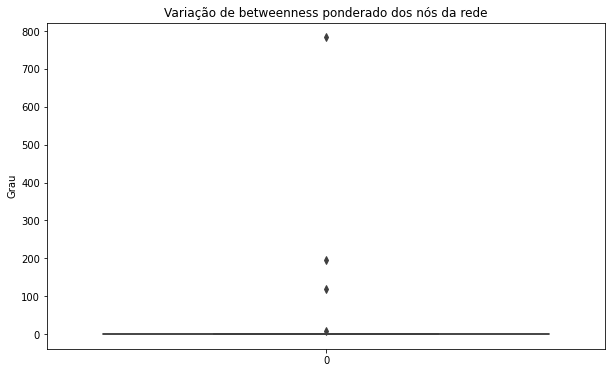

In [11]:
# Plota a variação de betweenness ponderado dos nós
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_wbetweenness['weightedBetweenness'])
plt.title('Variação de betweenness ponderado dos nós da rede')
plt.xlabel('')
plt.ylabel('Grau')

# Salva a figura
plt.savefig(fname=NETWORK_IMAGES_PATH / 'weighted-betweenness-centrality-boxplot.png', dpi=300)

# Exibe a figura
plt.show()

### Top-5 MicroRNAs

In [12]:
# Filtra o top-5 de microRNAs conforme a centralidade de intermediação ponderada
df_wbetweenness.head()

,miR,weightedBetweenness
0,hsa-miR-889-3p,783.000000
1,hsa-miR-369-3p,195.333333
2,hsa-miR-656-3p,119.333333
3,hsa-miR-376a-3p,8.000000
4,hsa-miR-1197,0.000000
